<a href="https://colab.research.google.com/github/Engr-Usman-Ali/codealpha_tasks_Sales_Prediction/blob/main/CodeAlpha_Code_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!git clone https://github.com/Engr-Usman-Ali/codealpha_tasks_Sales_Prediction.git

fatal: destination path 'codealpha_tasks_Sales_Prediction' already exists and is not an empty directory.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
# Load the dataset
file_path = "/content/codealpha_tasks_Sales_Prediction/Advertising.csv" # Change this if the file path is different
df = pd.read_csv(file_path)

# Drop unnecessary column
df = df.drop(columns=["Unnamed: 0"])

In [58]:
# Define features (X) and target variable (y)
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Model Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629
Mean Absolute Error (MAE): 1.4607567168117603
Root Mean Squared Error (RMSE): 1.78159966153345


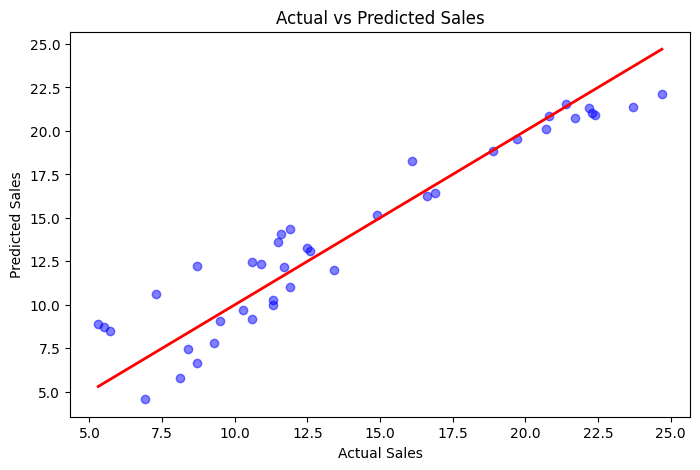

In [60]:
# Visualization: Actual vs Predicted Sales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

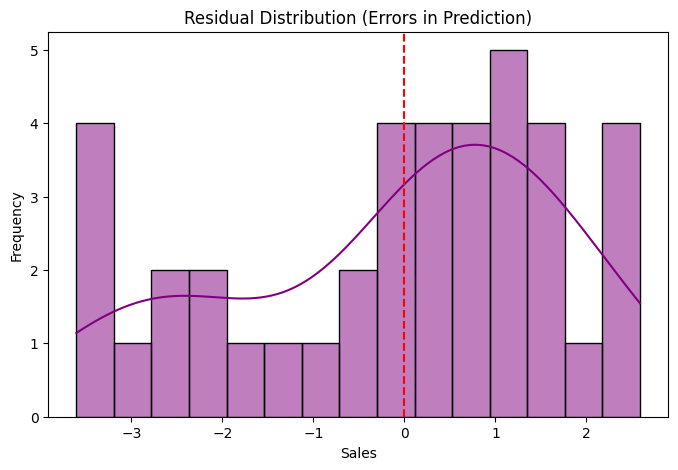

In [61]:
# --- Visualization 2: Residual Plot (Prediction Errors) ---
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=15, kde=True, color="purple")  # KDE for smooth curve
plt.axvline(x=0, color="red", linestyle="dashed")  # Centerline at zero
plt.ylabel("Frequency")
plt.title("Residual Distribution (Errors in Prediction)")
plt.show()

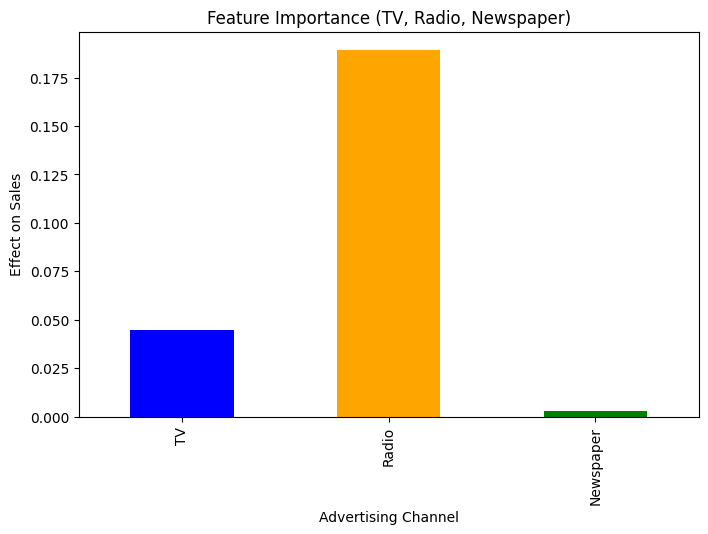

In [63]:
# --- Visualization 3: Feature Importance ---
feature_importance = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(8, 5))
feature_importance.plot(kind="bar", color=["blue", "orange", "green"])
plt.xlabel("Advertising Channel")
plt.ylabel("Effect on Sales")
plt.title("Feature Importance (TV, Radio, Newspaper)")
plt.show()